<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_69/blob/main/Actividad_Semanal4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Principal Component Analysis (PCA)** 
**Actividad Semanal 4**

*   A01794050 - Moreno Villarreal José Bernardo 
*   A01793814 - Emerson Jonathan Rincón Morales 

Prfr: Dr. Jobish 

**Descripción:** Para esta actividad se pone en práctica la técnica de dimensionalidad conocida como PCA, la cual tiene por objetivo aumentar la eficiencia y reducir el procesamiento de los datos. Se trata de un procedimiento estadístico en donde se deben determinar los componentes principales, es decir aquellos que tengan mayor varianza, de esta manera podemos reducir la cantidad de datos sin perder información significante. 



In [178]:
# Importamos librerías Pandas, Numpy y librerías para plotear
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [113]:
#Leemos el archivo desde la pagina de GitHub en un DataFrame y mostramos las primeras 5 filas. 
archivo = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df = pd.read_csv(archivo)
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [114]:
#Desplegamos el tamaño del DataFrame 
df.shape

(30000, 25)

In [115]:
#Se verifica si tenemos valores nulos o NaN
df.isnull().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [116]:
#Se retiran los valores que son Nan 
df = df.dropna()
df.isnull().any()

ID     False
X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool

In [117]:
#Se cambia el nombre de los headers 
df.columns=['ID','Amount','Gender','Education','Marital_status','Age','History1',
            'History2','History3','History4','History5','History6','Ammount1','Ammount2',
            'Ammount3','Ammount4','Ammount5','Ammount6','PreviousPayment1',
            'PreviousPayment2','PreviousPayment3','PreviousPayment4','PreviousPayment5',
            'PreviousPayment6','Prob']
df.head(2)

,ID,Amount,Gender,Education,Marital_status,Age,History1,History2,History3,History4,...,Ammount4,Ammount5,Ammount6,PreviousPayment1,PreviousPayment2,PreviousPayment3,PreviousPayment4,PreviousPayment5,PreviousPayment6,Prob
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0


In [118]:
#Se quitan datos categóricos ya que PCA es destinado para ser usado con datos numéricos
df = df.drop(columns={'ID','Gender','Marital_status','History1','History2','History3','History4','History5','History6','Education','Prob'})

In [119]:
#Se muestran los datos a utilizar con los headers correctos. 
df.head(2)

,Amount,Age,Ammount1,Ammount2,Ammount3,Ammount4,Ammount5,Ammount6,PreviousPayment1,PreviousPayment2,PreviousPayment3,PreviousPayment4,PreviousPayment5,PreviousPayment6
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0


In [120]:
#Se verifica el tamaño de datos finales después de retirar datos categóricos y NaN
df.shape

(29958, 14)

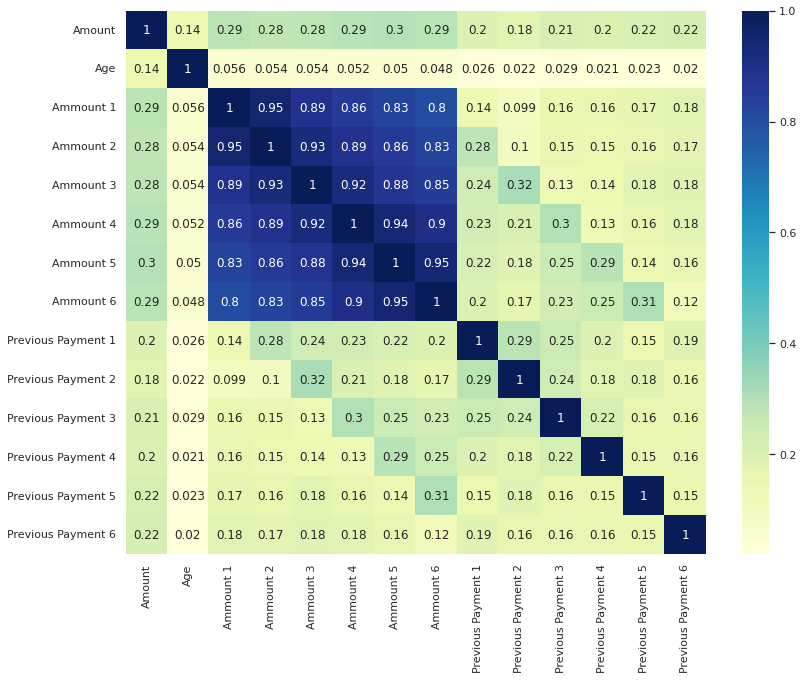

In [74]:
#Se realiza mapa de calor de la tabla de correlaciones entre variables
sns.set(rc={'figure.figsize':(13,10)}) 
mapacalor1=sns.heatmap(df.corr(method="pearson"), cmap="YlGnBu", annot=True)

Se observa que existe alta correlación entre: 



*   Ammount 1, Ammount 2,Ammount 3,Ammount 4,Ammount 5 y Ammount 6




Prueba de Correlación. 

In [130]:
#Se prueba la correlación entre dos variables
ndf = df[['Amount', 'Ammount1']]
ndf.corr()

,Amount,Ammount1
Amount,1.000000,0.285616
Ammount1,0.285616,1.000000


In [133]:
#Se obtienen la matriz de covarianza
Varience = np.cov([df.Ammount1, df.Amount])
Varience

array([[5.42799825e+09, 2.73003247e+09],
       [2.73003247e+09, 1.68317668e+10]])

In [134]:
#Se obtiene la varianza total 
ndf.var().sum()

22259765023.75696

In [138]:
#Se obtiene la varianza individual de cada una de las variables
t= ndf.var().sum()
varAmmount1 =Varience[0][0]
varAmount = Varience[1][1]

In [139]:
print('Total Varience \t\t\t:', t.round(2) )
print('Varience prop. of Ammount1 \t:', ((varAmmount1/t)*100).round(2),'%' )
print('Varience prop. of Amount \t:', ((varAmount/t)*100).round(2),'%' )

Total Varience 			: 22259765023.76
Varience prop. of Ammount1 	: 24.38 %
Varience prop. of Amount 	: 75.62 %


Se observa que la variable Amount representa el 75.62% del total de la varianza, esto es debido a que contine valores mucho más altos. Para obtener una visualización correcta es necesario realizar un escalamiento. 

In [185]:
#Escalamiento estándar
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
scaled_df=pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,Amount,Age,Ammount1,Ammount2,Ammount3,Ammount4,Ammount5,Ammount6,PreviousPayment1,PreviousPayment2,PreviousPayment3,PreviousPayment4,PreviousPayment5,PreviousPayment6
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


**Aplicando PCA**

In [194]:
pcs = PCA()
#Se utiliza .fit para escalar los datos, aunque previamente ya se habian escalado usando Standard Scaler 
pcs.fit(preprocessing.scale(scaled_df.iloc[:, :].dropna(axis=0)))  
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
#Se obtine matriz de Componentes principales. 
pcsSummary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.432921,1.309882,1.022269,0.961876,0.940087,0.934241,0.882984,0.852438,0.841041,0.514249,0.266470,0.202644,0.15918,0.152463
Proportion of variance,0.422779,0.122552,0.074643,0.066084,0.063124,0.062341,0.055688,0.051902,0.050523,0.018889,0.005072,0.002933,0.00181,0.001660
Cumulative proportion,0.422779,0.545331,0.619974,0.686058,0.749182,0.811523,0.867211,0.919113,0.969636,0.988525,0.993597,0.996530,0.99834,1.000000


**Scree Plot**

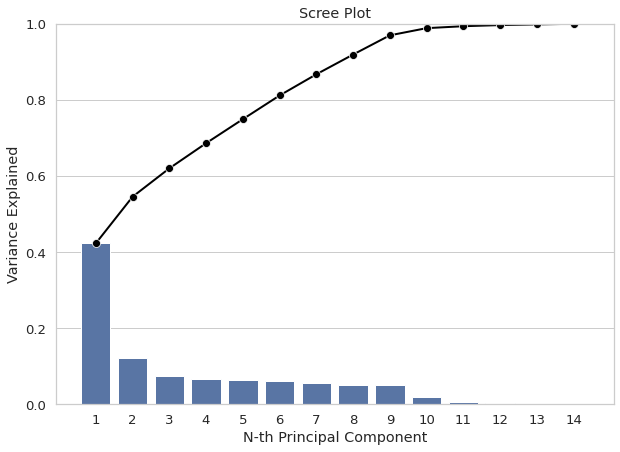

In [192]:
#Se realiza el Scree Plot para verificar la varianza acumulada de cada uno de los componentes principales 
PC_components = np.arange(pcs.n_components_) + 1
_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
print((pcsSummary_df.iloc[1][0:6]*100).sum().round(2))
}plt.show()

In [210]:
#Se plotea la varianza acumulada
print("Varianza explicada acumulada: ",(pcsSummary_df.iloc[1][0:1]*100).sum().round(2),"%")
print("Varianza explicada acumulada: ",(pcsSummary_df.iloc[1][0:2]*100).sum().round(2),"%")
print("Varianza explicada acumulada: ",(pcsSummary_df.iloc[1][0:3]*100).sum().round(2),"%")
print("Varianza explicada acumulada: ",(pcsSummary_df.iloc[1][0:4]*100).sum().round(2),"%")
print("Varianza explicada acumulada: ",(pcsSummary_df.iloc[1][0:5]*100).sum().round(2),"%")
print("Varianza explicada acumulada: ",(pcsSummary_df.iloc[1][0:6]*100).sum().round(2),"%","<-----")
print("Varianza explicada acumulada: ",(pcsSummary_df.iloc[1][0:7]*100).sum().round(2),"%")
print("Varianza explicada acumulada: ",(pcsSummary_df.iloc[1][0:8]*100).sum().round(2),"%")
print("Varianza explicada acumulada: ",(pcsSummary_df.iloc[1][0:9]*100).sum().round(2),"%")
print("Varianza explicada acumulada: ",(pcsSummary_df.iloc[1][0:10]*100).sum().round(2),"%")
print("Varianza explicada acumulada: ",(pcsSummary_df.iloc[1][0:11]*100).sum().round(2),"%")

Varianza explicada acumulada:  42.28 %
Varianza explicada acumulada:  54.53 %
Varianza explicada acumulada:  62.0 %
Varianza explicada acumulada:  68.61 %
Varianza explicada acumulada:  74.92 %
Varianza explicada acumulada:  81.15 % <-----
Varianza explicada acumulada:  86.72 %
Varianza explicada acumulada:  91.91 %
Varianza explicada acumulada:  96.96 %
Varianza explicada acumulada:  98.85 %
Varianza explicada acumulada:  99.36 %


Se observa que el 80% de la varianza se explica utilizando los 6 primeros componentes principales, es decir, de PC1 a PC6

In [217]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[:, :].columns 
                                )
pcsComponents_df.iloc[:,:6]

,PC1,PC2,PC3,PC4,PC5,PC6
Amount,0.165507,0.300709,-0.378575,-0.200103,0.035312,-0.078883
Age,0.032789,0.071906,-0.869471,0.338990,-0.039760,0.071461
Ammount1,0.372446,-0.190793,-0.034207,-0.063899,0.041391,-0.043987
Ammount2,0.383253,-0.174644,-0.001814,0.007629,0.083164,-0.028824
Ammount3,0.388264,-0.126883,0.034747,0.060528,0.113790,0.099239
Ammount4,0.391557,-0.120403,0.034073,0.074774,0.028378,0.014527
Ammount5,0.388505,-0.105928,0.033882,0.039553,-0.106756,-0.099290
Ammount6,0.380672,-0.094157,0.018489,-0.070616,-0.164986,0.069272
PreviousPayment1,0.135120,0.383194,0.173845,0.362055,0.225652,0.040574
PreviousPayment2,0.116768,0.408391,0.200925,0.345745,0.148714,0.408361


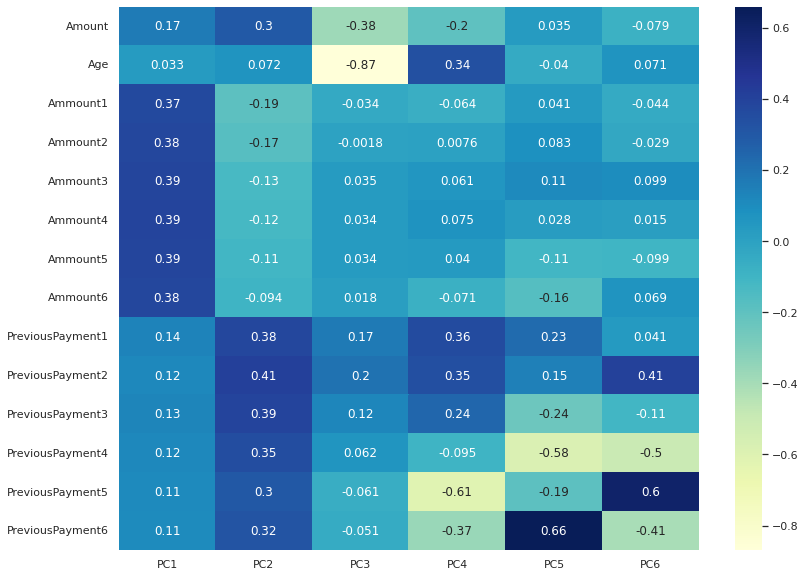

In [216]:
graph = pcsComponents_df.iloc[:,:6]
sns.set(rc={'figure.figsize':(13,10)}) 
mapacalor2=sns.heatmap(graph, cmap="YlGnBu", annot=True)


Se observa que las variables más contribuyentes para los componentes principales son las siguientes: 



1.   "Age" para PC3 con -0.87
2.   "Previous Payment 5" para PC4 con -0.61
3.   "Previous Payment 4" para PC5 con -0.58 y para PC6 con -0.5
4.   "Previous Payment 6" para PC6 con -0.41
5.   "Ammount" para PC3 con -0.38
6.   "Ammount1-Ammount6" para PC1 con 0.39

Identificación de Valores Atipicos

In [218]:
#Recordamos nuestra matriz escalada con Standard Scaler
scaled_df.head()

,Amount,Age,Ammount1,Ammount2,Ammount3,Ammount4,Ammount5,Ammount6,PreviousPayment1,PreviousPayment2,PreviousPayment3,PreviousPayment4,PreviousPayment5,PreviousPayment6
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


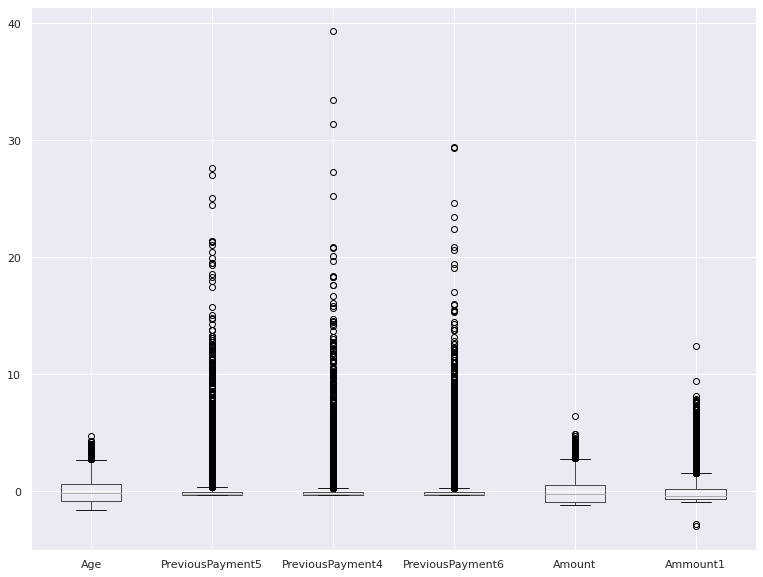

In [223]:
scaled_df[['Age',"PreviousPayment5","PreviousPayment4","PreviousPayment6","Amount","Ammount1"]].boxplot()


¿Cuál es el número de componentes mínimo y por qué?


¿Cuál es la variación de los datos que representan esos componentes?


¿Cuál es la pérdida de información después de realizar PCA?
De las variables originales

¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?


¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?